In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df=pd.read_csv('dataset_1.csv')

In [4]:
df.head()


,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
scaler=StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_feature=scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_feature,columns=df.columns[:-1])

print(df_feat.head())
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,df['TARGET CLASS'],test_size=0.20)
#plotting x_train and Y_train
# print("x_trin:",x_train.shape)
# plt.plot(x_train[:,:2],y_train)
    

[[-1.73031962 -0.12354188  0.18590747 ... -1.48236813 -0.9497194
  -0.64331425]
 [-1.72685552 -1.08483602 -0.43034845 ... -0.20224031 -1.82805088
   0.63675862]
 [-1.72339142 -0.78870217  0.33931821 ...  0.28570652 -0.68249379
  -0.37784986]
 ...
 [ 1.72339142  0.64177714 -0.51308341 ... -2.36249443 -0.81426092
   0.11159651]
 [ 1.72685552  0.46707241 -0.98278576 ... -0.03677699  0.40602453
  -0.85567   ]
 [ 1.73031962 -0.38765353 -0.59589427 ... -0.56778932  0.3369971
   0.01034996]]
   Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0   -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1   -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2   -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3   -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4   -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   

        FDJ       PJF       HQE       NXJ  
0 -

In [10]:
#using knn 
knn = KNeighborsClassifier(n_neighbors=1)
print(knn.fit(x_train,y_train))
pred=knn.predict(x_test)
# evaluate knn model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [11]:
pred

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1], dtype=int64)

In [12]:
y_test

840    1
598    1
661    0
993    1
460    1
      ..
269    1
545    0
238    1
945    1
248    1
Name: TARGET CLASS, Length: 200, dtype: int64

In [13]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[85 13]
 [ 7 95]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        98
           1       0.88      0.93      0.90       102

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mink

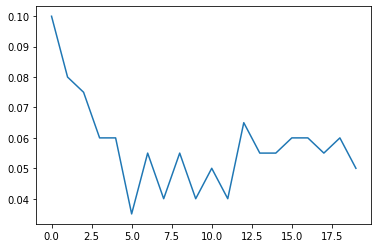

0.03500000000000003


In [14]:
error=[]
k_val=[]
for k in range(20):
    k_val.append(k)
    knn = KNeighborsClassifier(n_neighbors=1+k)
    print(knn.fit(x_train,y_train))
    pred=knn.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    error.append(1-accuracy)


plt.plot(k_val,error)
plt.show()
print(min(error))

In [13]:
#Loading Necessary Libraries
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import seaborn as sns
sns.set()
data= fetch_20newsgroups()


In [14]:
print(data.target_names)
#Defining all the categories
categories= data.target_names
#Training the data on these categories
train = fetch_20newsgroups(subset='train', categories=categories)
#Testing the data for these categories
test = fetch_20newsgroups(subset='test',categories=categories)
#printing training data
print(train.data[5])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accid

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


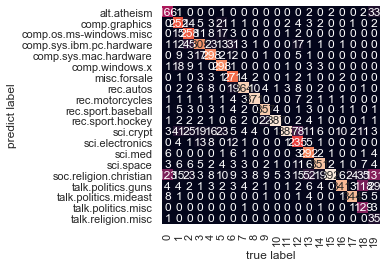

In [16]:
#Creating a model based on Multinomial Naive Bayes
model =make_pipeline(TfidfVectorizer(),MultinomialNB())
#traing the model with train data
model.fit(train.data,train.target)
#creating labels for the test data
labels= model.predict(test.data)
#creating confusion matrix and heat map
mat= confusion_matrix(test.target,labels)
sns.heatmap(mat.T,annot=True,square=True,fmt='d',cbar=False, yticklabels=train.target_names)
# plotting Heatmap of confusion Matrix
plt. xlabel('true label')
plt. ylabel('predict label')
#saving the Heatmap graph
plt.savefig('heatmap.jpg', dpi =500)


In [17]:
#predictig category on new data based on trained model
def predicting_category(s,train=train,model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]
print(predicting_category('Jesus christ'))
print(predicting_category('BMW is better than Audi'))
print(predicting_category('Prime minister of Nepal'))

soc.religion.christian
rec.autos
talk.politics.mideast


In [44]:
#seeing inside the function fit
import inspect
lines = inspect.getsource(knn.fit)
print(lines)

    def fit(self, X, y):
        """Fit the model using X as training data and y as target values

        Parameters
        ----------
        X : {array-like, sparse matrix, BallTree, KDTree}
            Training data. If array or matrix, shape [n_samples, n_features],
            or [n_samples, n_samples] if metric='precomputed'.

        y : {array-like, sparse matrix}
            Target values of shape = [n_samples] or [n_samples, n_outputs]

        """
        if not isinstance(X, (KDTree, BallTree)):
            X, y = check_X_y(X, y, "csr", multi_output=True)

        if y.ndim == 1 or y.ndim == 2 and y.shape[1] == 1:
            if y.ndim != 1:
                warnings.warn("A column-vector y was passed when a 1d array "
                              "was expected. Please change the shape of y to "
                              "(n_samples, ), for example using ravel().",
                              DataConversionWarning, stacklevel=2)

            self.outputs_2d_ = False